# Reading PX-1000 Data and Using Chart

In [1]:
%matplotlib inline

In [2]:
import os
import sys
import time
import numpy as np
import matplotlib
import radarkit
import chart

if not sys.version_info.major is 3:
    print('PyRadarKit requires Python 3')
    raise

In [3]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Arial']
matplotlib.rcParams['font.sans-serif'] = ['System Font', 'Verdana', 'Arial']
matplotlib.rc('text', usetex=False)

In [4]:
# Read a file
sweep = radarkit.read('/Users/boonleng/Downloads/PX-20170220-050706-E2.4-Z.nc')

In [5]:
if sweep is None:
    print('Unable to continue.\n')
    raise

In [6]:
# Number of gates that we want to show
ng = 1000

# Original range (km) and zimuth (rad) of the data
r = 1.0e-3 * sweep['range'][:ng]
a = sweep['azimuth'] * np.pi / 180.0

# Coordinates
rr, aa = np.meshgrid(r, a)
xx = rr * np.sin(aa)
yy = rr * np.cos(aa)

## Using `chart.showPPI()`

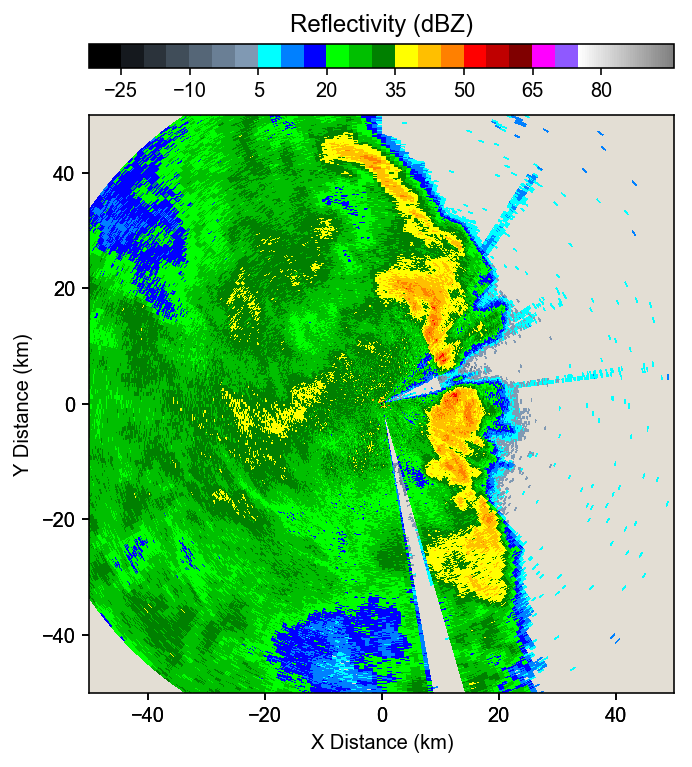

In [7]:
symbol = 'Z'
data = sweep['products'][symbol]['data'][:, :ng]
_ = chart.showPPI(xx, yy, data, style='Z')

## Generating All Product Figures Inline Using `chart.showPPI()`

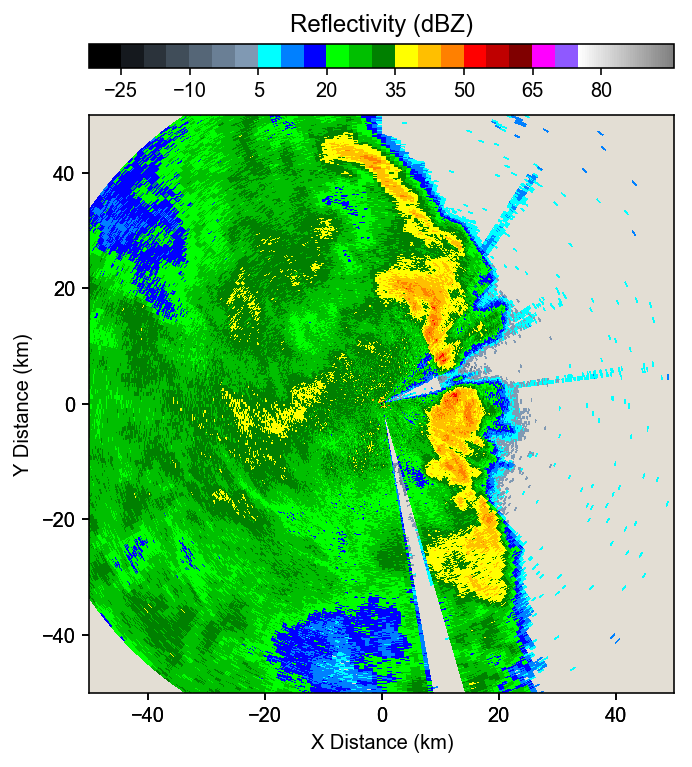

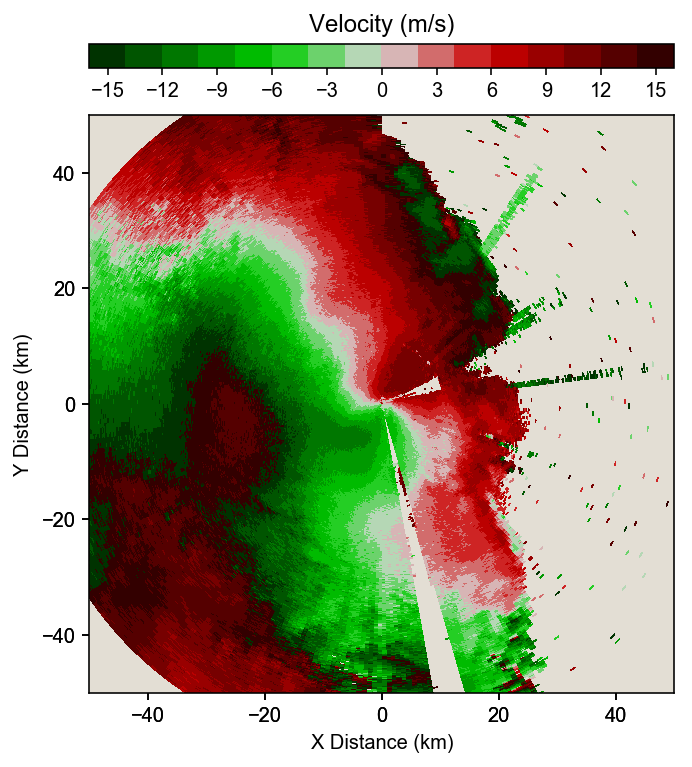

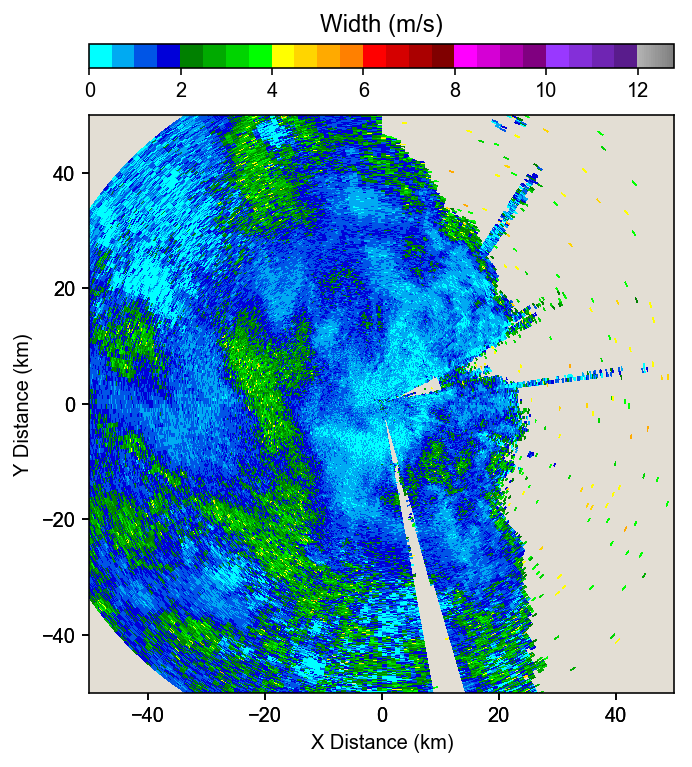

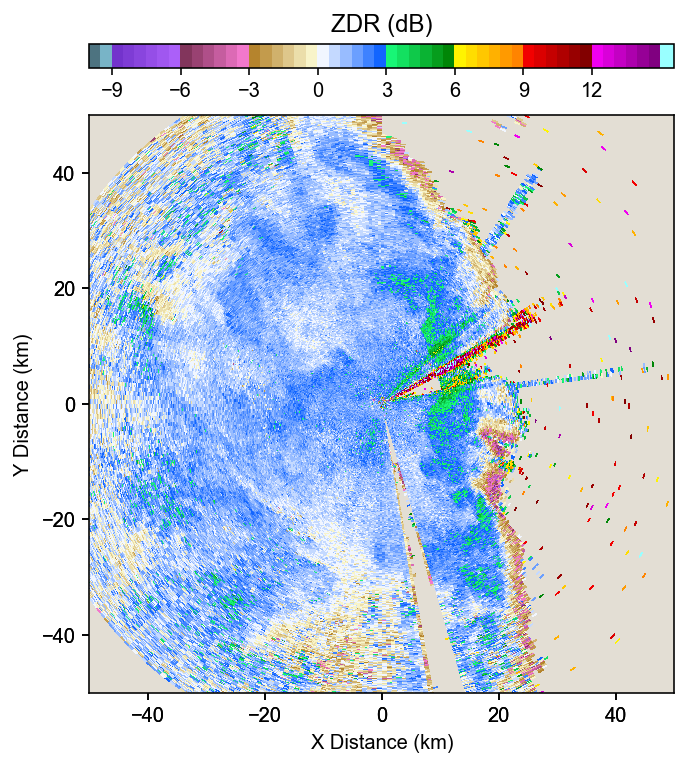

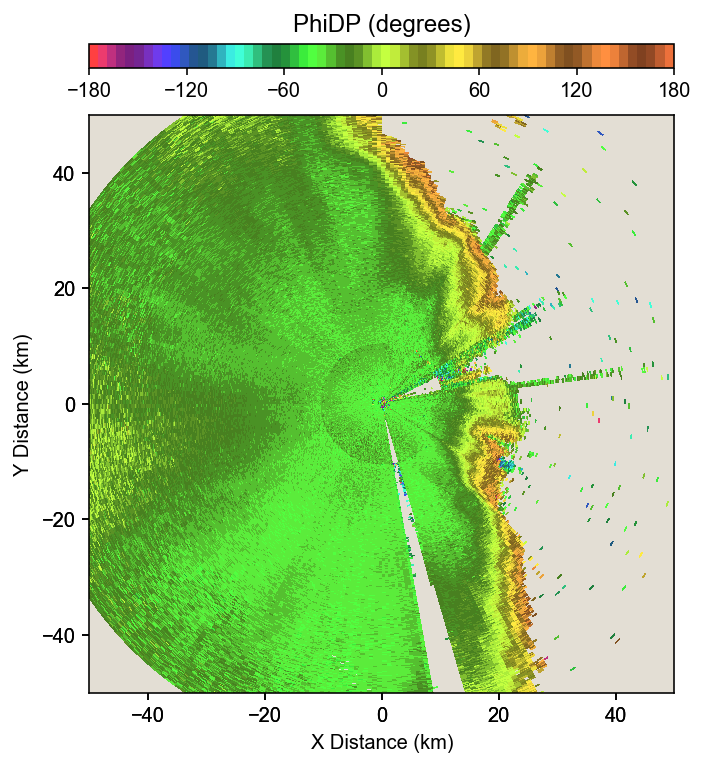

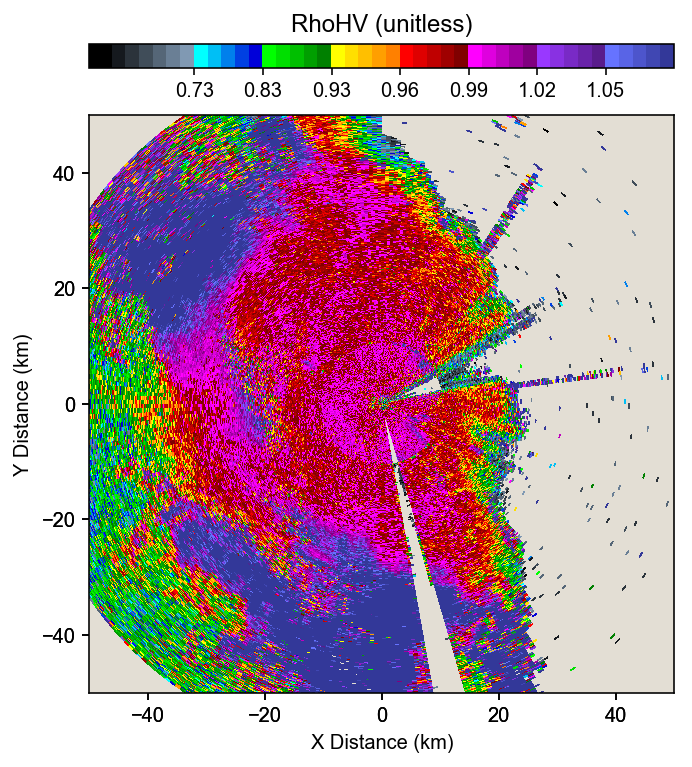

In [8]:
# Loop through all products
for key, product in sweep['products'].items():
    symbol = product['symbol']
    name = product['name']
    unit = product['unit']
    data = product['data'][:, 0:ng]

    #ppi = chart.showPPI(xx, yy, data, title='{} - {} ({})'.format(symbol, name, unit), style=symbol)
    _ = chart.showPPI(xx, yy, data, style=symbol)

## Using `chart.Chart()`

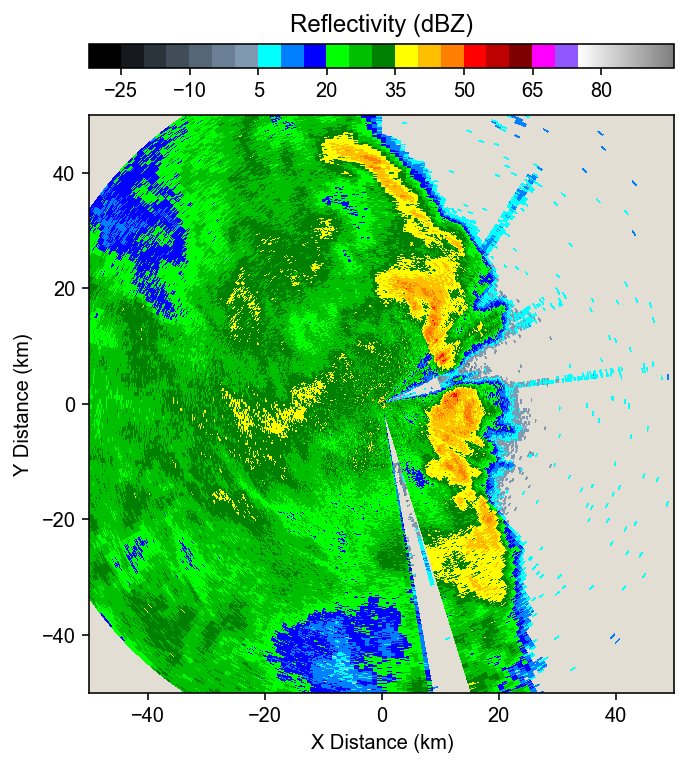

In [9]:
symbol = 'Z'
data = sweep['products'][symbol]['data'][:, :ng]
fig = chart.Chart(a, r, data, style='Z')

## Generating All Product Figures Off-Screen and Saving PNGs Using `chart.Chart()`

In [10]:
folder = os.path.expanduser('~/Downloads')

for key, product in sweep['products'].items():
    symbol = product['symbol']
    name = product['name']
    unit = product['unit']
    data = product['data'][:, 0:ng]
    # Set figure with new data and symbol
    fig.set_data(data, style=symbol)
    fig.savefig('{}/{}.png'.format(folder, symbol))

## Performance Measurements

In [11]:
symbol = 'P'
data = sweep['products'][symbol]['data'][:, :ng]

0.047799110412597656


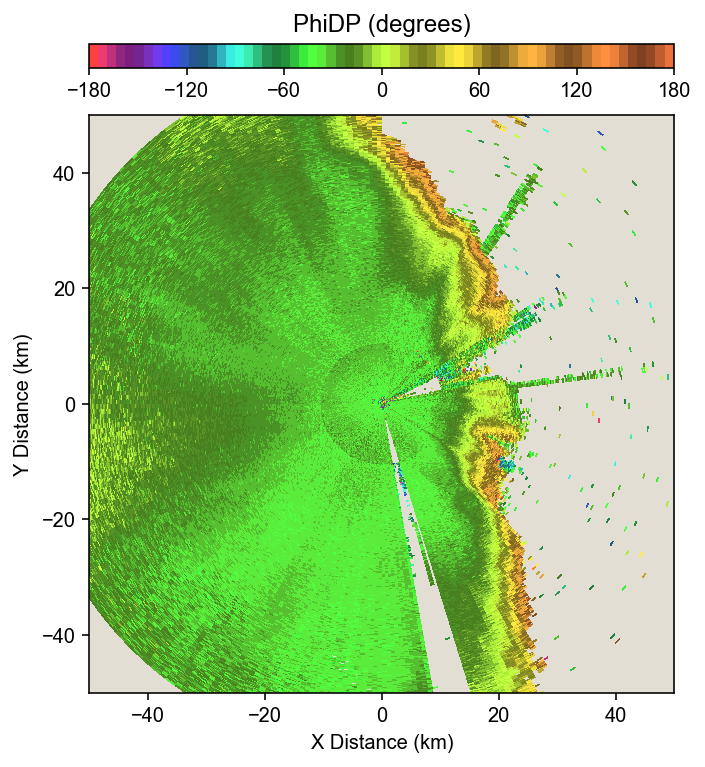

In [12]:
s = time.time()
fig = chart.Chart(a, r, data, style=symbol)
e = time.time()
print(e - s)

0.058593034744262695


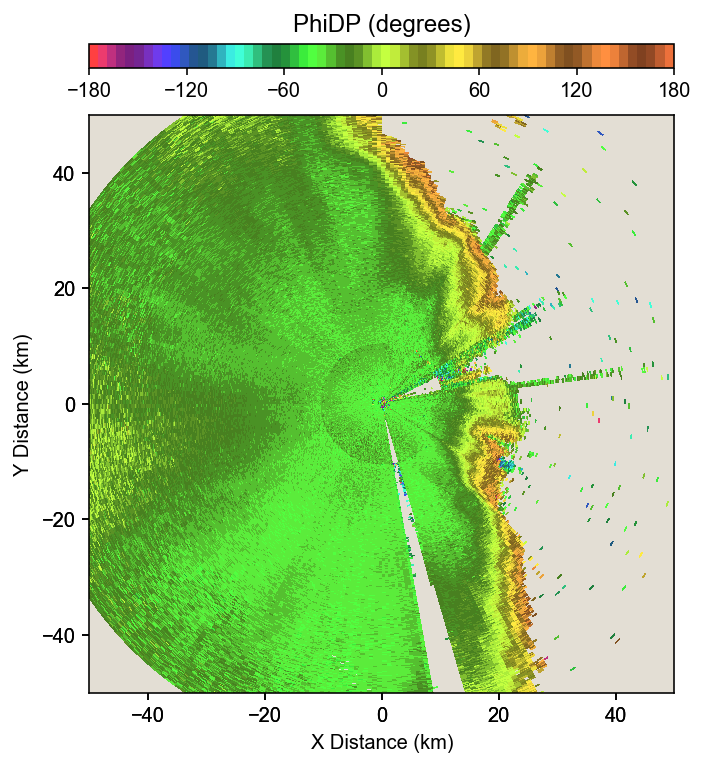

In [13]:
s = time.time()
ppi = chart.showPPI(xx, yy, data, style=symbol)
e = time.time()
print(e - s)

0.023636817932128906


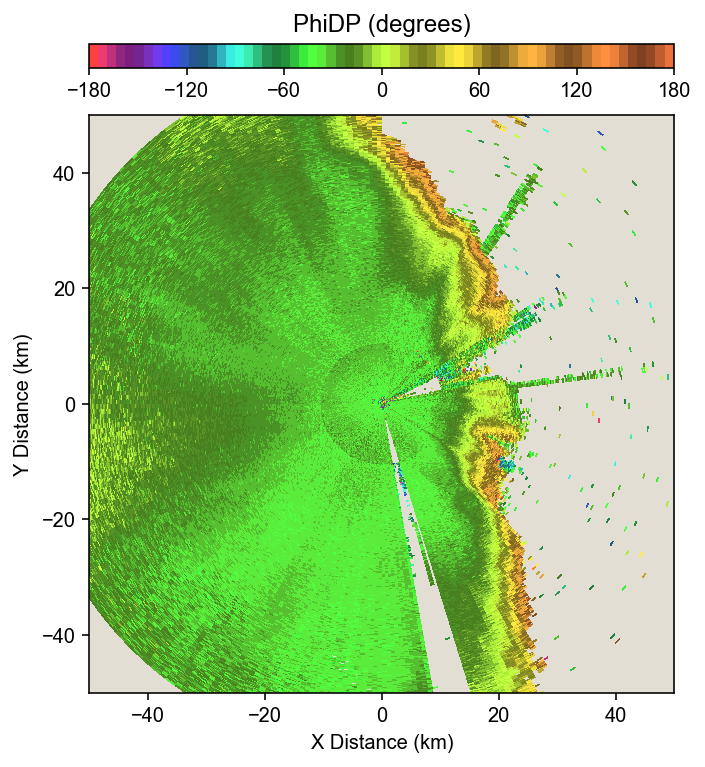

In [14]:
s = time.time()
fig.set_data(data, style=symbol)
e = time.time()
print(e - s)
fig.fig